In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données brutes
df_original = pd.read_excel("online_retail_II.xlsx")
df = df_original.copy()

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### 3.1 Fiche synthétique des données

- **Source :** Online Retail II (UCI Machine Learning Repository).  
- **Périmètre :** transactions e-commerce d’un détaillant basé au Royaume-Uni.  
- **Période couverte :** 01/12/2009 → 09/12/2010.  
- **Volume :** environ 525k lignes, 8 colonnes.  
- **Granularité :** 1 ligne = une ligne de facture (produit × quantité × prix).

In [2]:
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])

print("Date de début :", df["InvoiceDate"].min())
print("Date de fin   :", df["InvoiceDate"].max())

Nombre de lignes : 525461
Nombre de colonnes : 8
Date de début : 2009-12-01 07:45:00
Date de fin   : 2010-12-09 20:01:00


### 3.2 Dictionnaire des variables

| Variable     | Type     | Description                            |
|--------------|----------|----------------------------------------|
| Invoice      | object   | Numéro de facture                      |
| StockCode    | object   | Référence produit                      |
| Description  | object   | Libellé du produit                     |
| Quantity     | int64    | Quantité (négatif = retour)            |
| InvoiceDate  | datetime | Date et heure de transaction           |
| Price        | float64  | Prix unitaire                          |
| Customer ID  | float64  | Identifiant client                     |
| Country      | object   | Pays du client                         |

### 3.3 Qualité des données

Points analysés :
1. Valeurs manquantes.  
2. Doublons éventuels.  
3. Valeurs aberrantes sur les prix et quantités.  
4. Factures annulées (numéro commençant par \"C\").

In [3]:
# 1. Valeurs manquantes
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [4]:
# 2. Doublons
df.duplicated().sum()

np.int64(6865)

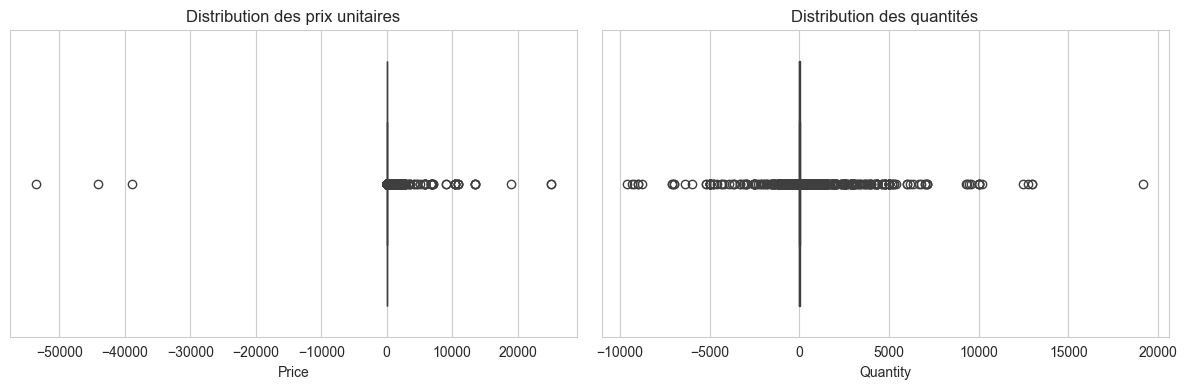

In [5]:
# 3. Valeurs aberrantes sur les prix et quantités
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(x=df["Price"], ax=axes[0])
axes[0].set_title("Distribution des prix unitaires")

sns.boxplot(x=df["Quantity"], ax=axes[1])
axes[1].set_title("Distribution des quantités")

plt.tight_layout()
plt.show()

In [6]:
# 4. Factures annulées
df['Invoice'] = df['Invoice'].astype(str)
cancelled = df[df['Invoice'].str.startswith('C')]
print("Nombre de lignes annulées :", cancelled.shape[0])

Nombre de lignes annulées : 10206


**Résumé qualité des données :**
- Valeurs manquantes principalement sur `Customer ID` et `Description`.  
- Présence de retours : quantités négatives et factures dont le numéro commence par \"C\".  
- Quelques valeurs extrêmes sur les prix et quantités.  

Ces points seront pris en compte dans la préparation des données (cohortes, RFM, CLV).